In [2]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import preprocessing    
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
sub_data = data.select_dtypes(include=['object'])
sub_data.head()
subdata1 = data.select_dtypes(exclude=['object'])

def convert(data):
    number = preprocessing.LabelEncoder()
    for each in data.columns:
        data[each] = number.fit_transform(data[each])
    data = data.fillna(-9999)
    return data

sub_data = convert(sub_data)
# sub_data.head()

/home/deepshikha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
y = sub_data['deposit']

In [6]:
sub_data = sub_data.drop(['deposit'], axis=1)

In [7]:
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(sub_data)

# 3. Transform
onehotlabels = enc.transform(sub_data).toarray()


new_col_names = enc.get_feature_names(sub_data.columns.tolist())
sub_data = pd.DataFrame(onehotlabels, columns=new_col_names)

/home/deepshikha/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [8]:
data1 = pd.concat([sub_data, subdata1], axis=1)
data1.head()

,job_0.0,job_1.0,job_2.0,job_3.0,job_4.0,job_5.0,job_6.0,job_7.0,job_8.0,job_9.0,...,poutcome_1.0,poutcome_2.0,poutcome_3.0,age,balance,day,duration,campaign,pdays,previous
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,59,2343,5,1042,1,-1,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,56,45,5,1467,1,-1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,41,1270,5,1389,1,-1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,55,2476,5,579,1,-1,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,54,184,5,673,2,-1,0


In [15]:
corr = data1.corr()

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import seaborn as sns

Text(0.5, 1, 'Heatmap of Correlation Matrix')

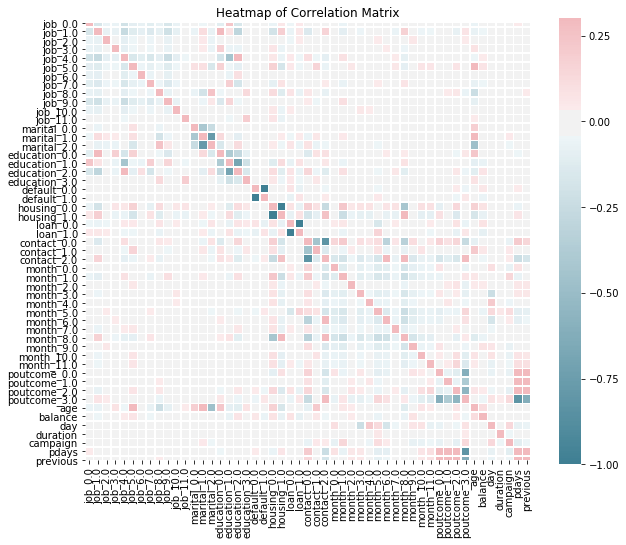

In [18]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [9]:
X = data1

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=8)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [23]:
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.8118841445207524


In [24]:
y_train1 = clf.predict(X_train)
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train1))

Train Accuracy: 0.8382183540253424
